In [38]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import seaborn as sb

mpl.style.use('report_style.mplstyle')

updated10


consider making the endpoints of a linear map parameters that go into experiments, then can generate a phase diagram with axes=endpoints and colours=steady-state density

In [105]:
prop = 0.05
beta_mod_rule = 'e_homo_lin_with_endpoints'
res = 10
y_1 = np.linspace(0, 1, res)
y_2 = np.linspace(0, 1, res)

ensemble_size = 10
run_length = 10**5
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

generate data for the "physical" half of the space of parameters

In [106]:
for social_structure in social_structures[-1:]:
    for i in tqdm(y_1):
        for j in y_2:
            params = (i, j)
            if i>j:
                pass
            else:
                run_ensemble_experiment(prop, ensemble_size, run_length, social_structure, beta_mod_rule=beta_mod_rule, beta_mod_rule_params=params)

100%|██████████| 10/10 [53:03<00:00, 318.31s/it]


generate data for the whole space of parameters

In [99]:
for social_structure in social_structures[-1:]:
    for i in tqdm(y_1):
        for j in y_2:
            params = (i, j)
            run_ensemble_experiment(prop, ensemble_size, run_length, social_structure, beta_mod_rule=beta_mod_rule, beta_mod_rule_params=params)

100%|██████████| 20/20 [5:41:40<00:00, 1025.02s/it]


# Plotting half

Plotting half of the possible space of parameters

loaded data: (0.0, 1.0)
(0.0, 1.0): 0.8374233128834356
loaded data: (0.0, 0.8888888888888888)
(0.0, 0.8888888888888888): 0.6165644171779141
loaded data: (0.0, 0.7777777777777777)
(0.0, 0.7777777777777777): 1.0
loaded data: (0.0, 0.6666666666666666)
(0.0, 0.6666666666666666): 1.0
loaded data: (0.0, 0.5555555555555556)
(0.0, 0.5555555555555556): 1.0
loaded data: (0.0, 0.4444444444444444)
(0.0, 0.4444444444444444): 1.0
loaded data: (0.0, 0.3333333333333333)
(0.0, 0.3333333333333333): 1.0
loaded data: (0.0, 0.2222222222222222)
(0.0, 0.2222222222222222): 0.39263803680981596
loaded data: (0.0, 0.1111111111111111)
(0.0, 0.1111111111111111): 0.2223926380368098
loaded data: (0.0, 0.0)
(0.0, 0.0): 0.049079754601226995
loaded data: (0.1111111111111111, 1.0)
(0.1111111111111111, 1.0): 0.24386503067484663
loaded data: (0.1111111111111111, 0.8888888888888888)
(0.1111111111111111, 0.8888888888888888): 0.9739263803680982
loaded data: (0.1111111111111111, 0.7777777777777777)
(0.1111111111111111, 0.7777

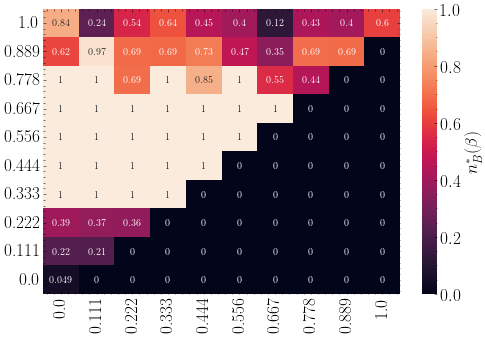

In [107]:
social_structure = 'Thiers13'

Bstar_arr = np.zeros((res,res))


for i,y1 in enumerate(y_1[::]):
    for j, y2 in enumerate(y_2[::-1]):
        if y1>y2:
            pass
        else:
            params = (y1, y2)
            fname = f'{social_structure}_{beta_mod_rule}_{params}_{prop}_{run_length}_{ensemble_size}'

            data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

            print(f'loaded data: {params}')

            A_data = data[0::3,:]
            B_data = data[1::3,:]
            AB_data = data[2::3,:]

            N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

            B_data = B_data/N

            Bstar_arr[j,i] = np.median(B_data[:, -1])
            print(f'{params}: {np.median(B_data[:, -1])}')

fname = f'heatmap_{social_structure}_{beta_mod_rule}_{prop}_{run_length}_{ensemble_size}'

sb.heatmap(Bstar_arr, xticklabels=np.round_(y_1[::], decimals=3), yticklabels=np.round_(y_2[::-1], decimals=3), annot=True, cbar_kws={'label':r'$n_{B}^{\ast}(\beta)$'})
plt.savefig(f'figures/{fname}.pdf')



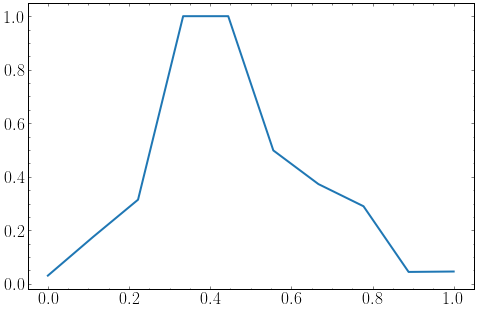

In [90]:
fname = f'diagonal_vals_{social_structure}_{beta_mod_rule}_{prop}_{run_length}_{ensemble_size}'
y = [Bstar_arr[9-i,i] for i in range(10)]
plt.plot(y_1, y)
plt.savefig(f'figures/{fname}.pdf')

# Plotting full

20it [21:25, 64.26s/it]


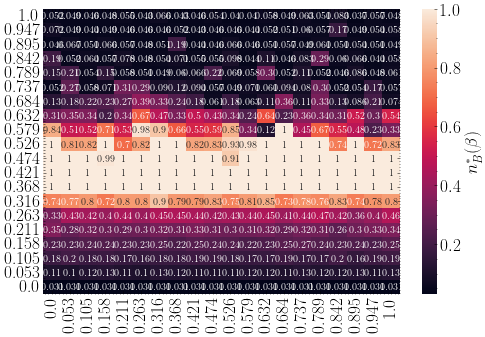

In [100]:
social_structure = 'Thiers13'

Bstar_arr = np.zeros((res,res))


for i,y1 in tqdm(enumerate(y_1[::])):
    for j, y2 in enumerate(y_2[::-1]):
        
        params = (y1, y2)
        fname = f'{social_structure}_{beta_mod_rule}_{params}_{prop}_{run_length}_{ensemble_size}'

        data = genfromtxt(f'outputs/{fname}.csv', delimiter=',')

        #print(f'loaded data: {params}')

        A_data = data[0::3,:]
        B_data = data[1::3,:]
        AB_data = data[2::3,:]

        N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

        B_data = B_data/N

        Bstar_arr[j,i] = np.median(B_data[:, -1])
        #print(f'{params}: {np.median(B_data[:, -1])}')

fname = f'heatmap_full_{social_structure}_{beta_mod_rule}_{prop}_{run_length}_{ensemble_size}'

sb.heatmap(Bstar_arr, xticklabels=np.round_(y_1[::], decimals=3), yticklabels=np.round_(y_2[::-1], decimals=3), annot=True, cbar_kws={'label':r'$n_{B}^{\ast}(\beta)$'})
plt.savefig(f'figures/{fname}.pdf')

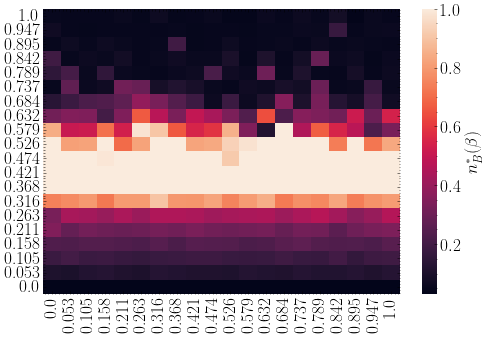

In [101]:
fname = f'heatmap_full_{social_structure}_{beta_mod_rule}_{prop}_{run_length}_{ensemble_size}'

sb.heatmap(Bstar_arr, xticklabels=np.round_(y_1[::], decimals=3), yticklabels=np.round_(y_2[::-1], decimals=3), annot=False, cbar_kws={'label':r'$n_{B}^{\ast}(\beta)$'})
plt.savefig(f'figures/{fname}.pdf')